# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataf=pd.read_csv('C:/Users/User/Downloads/insurance.csv')
dataf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Pre-Processing And Data Visualization 

In [3]:
dataf.dropna()      #if any null values present in any column, then it drops that specific column
print(len(dataf))

1338


In [4]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
dataf.corr()               #describes pairwise relation of columns of dataf data frame

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


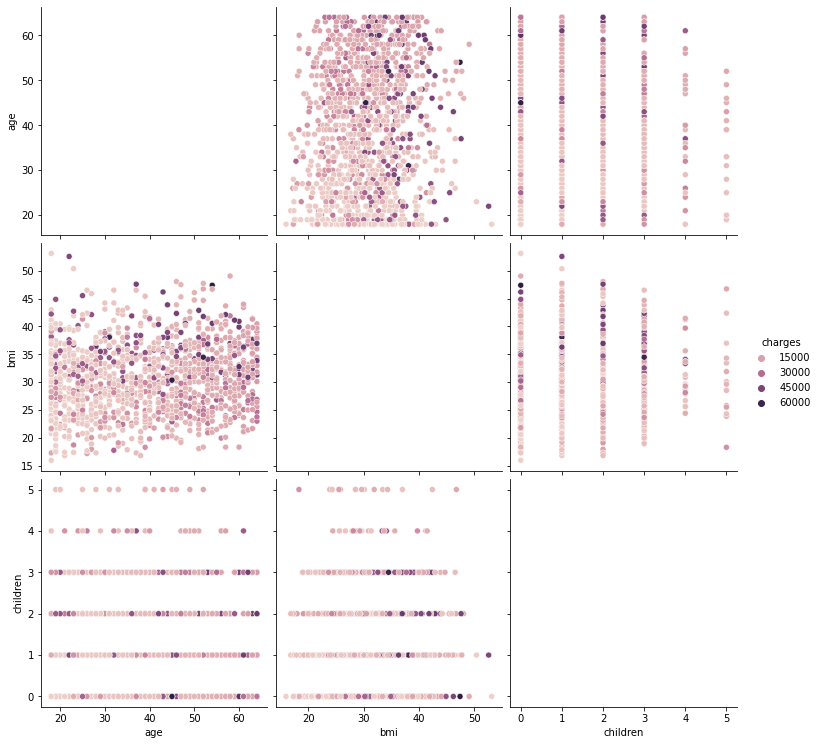

In [7]:
sns.pairplot(dataf, hue='charges', size=3.5)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

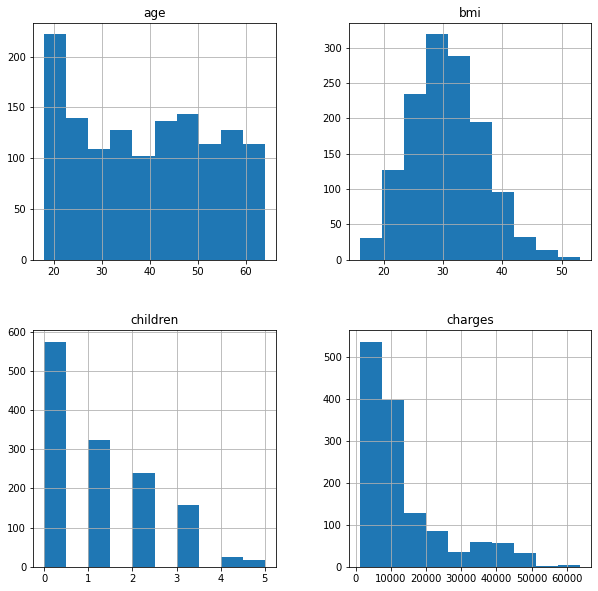

In [8]:
dataf.hist(figsize=(10,10))

### One hot encoding

In [9]:
# Since our dataset have different datatypes we will change string/text values into numerical values using one-hot-encoding

'''Doing one hot encoding for columns of sex, smoker, region'''

dummies = pd.get_dummies(dataf.sex)
dataf=pd.concat([dataf,dummies], axis= 1)
dataf=dataf.drop(['sex'], axis = 1)

dummies1 = pd.get_dummies(dataf.smoker)
dataf=pd.concat([dataf,dummies1], axis= 1)
dataf=dataf.drop(['smoker'], axis = 1)

dummies2 = pd.get_dummies(dataf.region)
dataf=pd.concat([dataf,dummies2], axis= 1)
dataf=dataf.drop(['region'], axis = 1)

dataf.head(5)

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'charges'}>,
        <AxesSubplot:title={'center':'female'}>,
        <AxesSubplot:title={'center':'male'}>],
       [<AxesSubplot:title={'center':'no'}>,
        <AxesSubplot:title={'center':'yes'}>,
        <AxesSubplot:title={'center':'northeast'}>],
       [<AxesSubplot:title={'center':'northwest'}>,
        <AxesSubplot:title={'center':'southeast'}>,
        <AxesSubplot:title={'center':'southwest'}>]], dtype=object)

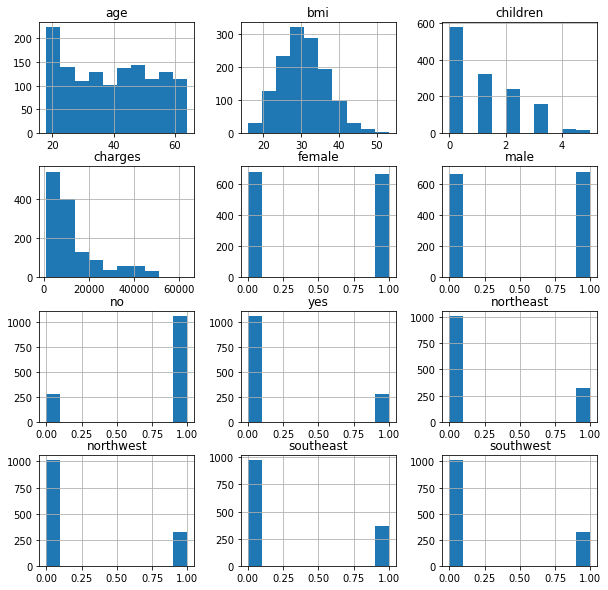

In [10]:
dataf.hist(figsize=(10,10))

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


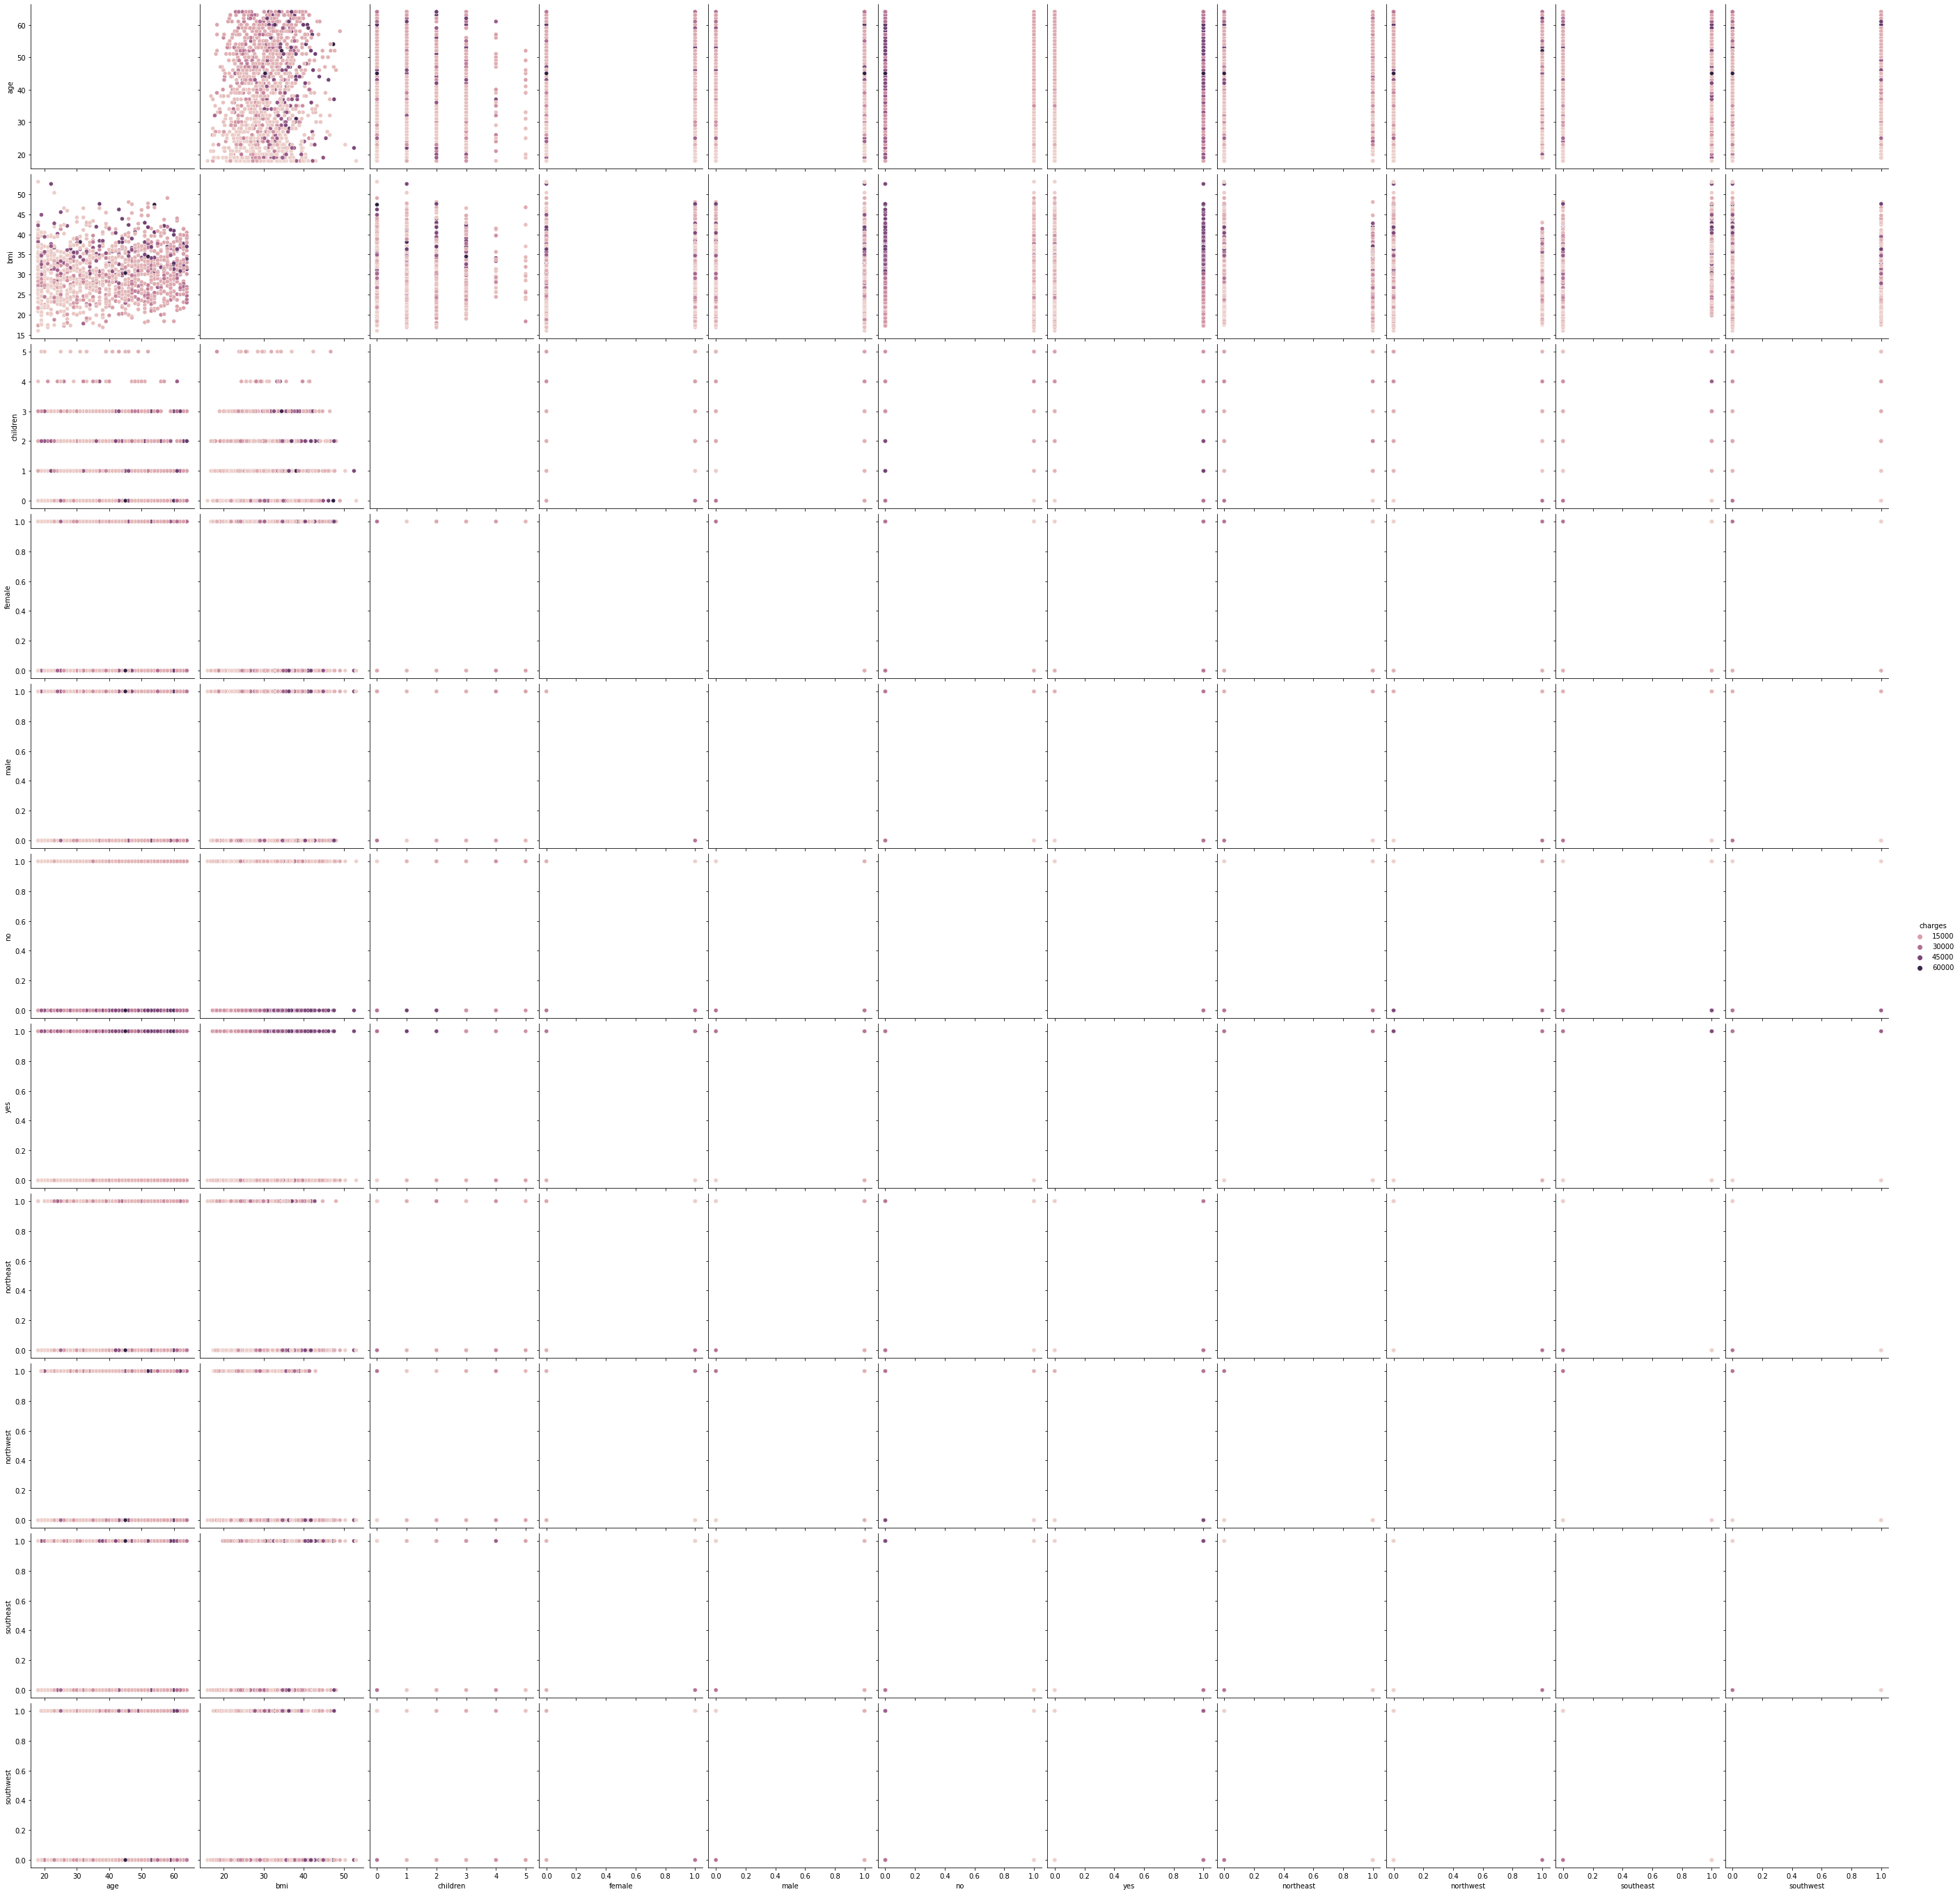

In [11]:
sns.pairplot(dataf, hue='charges', size=3.5)

In [12]:
#Due to one hot encoding many columns are inserted at last, since our output variable is charges adding it as last index
last_column = dataf.pop('charges')             
dataf.insert(11, 'charges', last_column)     #popping and adding RainTomorrow column at last index of dataframe
dataf.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520


In [13]:
X = dataf.drop(columns= 'charges').values
y = dataf.iloc[:, 11].values  

#Just for keeping the view organized I converted them to integers, I will defienetly consider float values further
X_int = X.astype(int)
y_int = y.astype(int)
#to view data of x and y, printing first 10 records
for i in range(10):
    print('X=',X_int[i, ], 'y=',y_int[i])

X= [19 27  0  1  0  0  1  0  0  0  1] y= 16884
X= [18 33  1  0  1  1  0  0  0  1  0] y= 1725
X= [28 33  3  0  1  1  0  0  0  1  0] y= 4449
X= [33 22  0  0  1  1  0  0  1  0  0] y= 21984
X= [32 28  0  0  1  1  0  0  1  0  0] y= 3866
X= [31 25  0  1  0  1  0  0  0  1  0] y= 3756
X= [46 33  1  1  0  1  0  0  0  1  0] y= 8240
X= [37 27  3  1  0  1  0  0  1  0  0] y= 7281
X= [37 29  2  0  1  1  0  1  0  0  0] y= 6406
X= [60 25  0  1  0  1  0  0  1  0  0] y= 28923


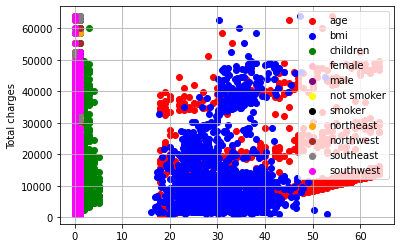

In [14]:
# interpretation and visualization of data

plt.scatter(X[:,0], y, color='red', label ='age')
plt.scatter(X[:,1], y, color='blue', label ='bmi')
plt.scatter(X[:,2], y, color='green', label ='children')
plt.scatter(X[:,3], y, color='pink', label ='female')
plt.scatter(X[:,4], y, color='purple', label ='male')
plt.scatter(X[:,5], y, color='yellow', label ='not smoker')
plt.scatter(X[:,6], y, color='black', label ='smoker')
plt.scatter(X[:,7], y, color='orange', label ='northeast')
plt.scatter(X[:,8], y, color='brown', label ='northwest')
plt.scatter(X[:,9], y, color='grey', label ='southeast')
plt.scatter(X[:,10], y, color='magenta', label ='southwest')

plt.ylabel("Total charges")
plt.rcParams["figure.figsize"] = (30,20)
plt.grid()
plt.legend()

## Data spltting

In [15]:
'''Splitting the entire data set into two parts, say 70/30 percentage
70% of the data for model building as training dataset and the rest 30% for testing the accuracy as testing data set'''
#70% of 145460 = 936
#30% of 145460 = 402
    
shuffle_dataf = dataf.sample(frac=1)    # Shuffles dataset

train_size = int(0.7 * len(dataf))      # assigns train_size to be 936

train_set = shuffle_dataf[:train_size]   #After shuffling assigns first 70% records to train_set
test_set = shuffle_dataf[train_size:]    #Assigns remaining 30% records to test_set

In [16]:
print(len(train_set))
print(len(test_set))
print(len(train_set)+len(test_set))

936
402
1338


In [17]:
X_train=train_set.drop(columns= 'charges').values
y_train=train_set.iloc[:, 11].values
X_test=test_set.drop(columns= 'charges').values
y_test=test_set.iloc[:, 11].values

In [18]:
print(X_train[:5])

[[38.    28.93   1.     1.     0.     1.     0.     0.     0.     1.
   0.   ]
 [38.    27.265  1.     1.     0.     1.     0.     1.     0.     0.
   0.   ]
 [54.    31.24   0.     1.     0.     1.     0.     0.     0.     1.
   0.   ]
 [48.    35.91   1.     1.     0.     1.     0.     1.     0.     0.
   0.   ]
 [50.    27.83   3.     1.     0.     1.     0.     0.     0.     1.
   0.   ]]


### Feature Scaling 

In [19]:
def feature_scaling(X):
    mean=np.mean(X, axis=0)
    sd=np.std(X, axis=0)
    X_scaling = (X-mean)/sd
    return mean, sd, X_scaling

In [20]:
mean, sd, X_train = feature_scaling(X_train)
print('mean= ',mean)
print('sd= ',sd)
print('X_scaling=\n',X_train[:5])

mean=  [39.66132479 30.71223825  1.09508547  0.4957265   0.5042735   0.79807692
  0.20192308  0.24252137  0.23717949  0.27991453  0.24038462]
sd=  [14.08443858  6.17022738  1.22061066  0.49998174  0.49998174  0.40143511
  0.40143511  0.42860793  0.42535324  0.448957    0.42731704]
X_scaling=
 [[-0.11795463 -0.28884482 -0.07789992  1.00858385 -1.00858385  0.50300303
  -0.50300303 -0.565835   -0.55760593  1.60390744 -0.56254395]
 [-0.11795463 -0.55868901 -0.07789992  1.00858385 -1.00858385  0.50300303
  -0.50300303  1.76729964 -0.55760593 -0.62347737 -0.56254395]
 [ 1.01805089  0.0855336  -0.89716198  1.00858385 -1.00858385  0.50300303
  -0.50300303 -0.565835   -0.55760593  1.60390744 -0.56254395]
 [ 0.59204882  0.84239387 -0.07789992  1.00858385 -1.00858385  0.50300303
  -0.50300303  1.76729964 -0.55760593 -0.62347737 -0.56254395]
 [ 0.73404951 -0.46712026  1.5606242   1.00858385 -1.00858385  0.50300303
  -0.50300303 -0.565835   -0.55760593  1.60390744 -0.56254395]]


In [21]:
mean, sd, X_test = feature_scaling(X_test)
print('mean= ',mean)
print('sd= ',sd)
print('X_scaling=\n',X_test[:5])

mean=  [38.14925373 30.54967662  1.09452736  0.49253731  0.50746269  0.78855721
  0.21144279  0.24129353  0.25621891  0.25373134  0.24875622]
sd=  [13.89432799  5.9176883   1.16798926  0.49994431  0.49994431  0.40833165
  0.40833165  0.42786793  0.43654413  0.43514566  0.43229222]
X_scaling=
 [[ 0.85291972  0.2636711   0.77524055 -0.98518437  0.98518437  0.51782121
  -0.51782121  1.77322584 -0.58692555 -0.58309519 -0.57543534]
 [ 0.7809479  -0.57111433 -0.93710396  1.01503844 -1.01503844  0.51782121
  -0.51782121 -0.56394396 -0.58692555  1.71498585 -0.57543534]
 [ 0.7809479   0.8973645  -0.93710396 -0.98518437  0.98518437  0.51782121
  -0.51782121 -0.56394396 -0.58692555  1.71498585 -0.57543534]
 [-1.09031928 -0.43085686 -0.93710396  1.01503844 -1.01503844  0.51782121
  -0.51782121 -0.56394396 -0.58692555 -0.58309519  1.73781472]
 [ 0.70897609  0.15129614 -0.08093171 -0.98518437  0.98518437  0.51782121
  -0.51782121  1.77322584 -0.58692555 -0.58309519 -0.57543534]]


In [22]:
'''#now adding a column with all 1's works, adding it before feature scaling gives NaN values, so adding 1's now won't be a problem
ones=np.ones((499,1))
#X_train = np.hstack((ones,X_train))
X_test = np.hstack((ones,X_test))
print(X_test)'''
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (936, 11)
Shape of Y_train :  (936,)
Shape of X_test :  (402, 11)
Shape of Y_test :  (402,)


In [23]:
#now adding a column with all 1's works, adding it before feature scaling gives NaN values, so adding 1's now won't be a problem
ones_train=np.ones((936,1))
X_train = np.hstack((ones_train,X_train))
ones_test=np.ones((402,1))
X_test = np.hstack((ones_test,X_test))
print(X_train)

[[ 1.         -0.11795463 -0.28884482 ... -0.55760593  1.60390744
  -0.56254395]
 [ 1.         -0.11795463 -0.55868901 ... -0.55760593 -0.62347737
  -0.56254395]
 [ 1.          1.01805089  0.0855336  ... -0.55760593  1.60390744
  -0.56254395]
 ...
 [ 1.         -0.82795808  1.11953115 ... -0.55760593  1.60390744
  -0.56254395]
 [ 1.         -1.04095912 -0.78963674 ... -0.55760593 -0.62347737
  -0.56254395]
 [ 1.         -0.5439567  -0.28884482 ... -0.55760593  1.60390744
  -0.56254395]]


In [24]:
len(X_train[0])

12

In [25]:
theta = np.zeros(12)
print(theta)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
m=len(X_train)
print(m)

936


### Cost Function

In [27]:
def totcharge(X, y, theta, c):
    
    prediction=X.dot(theta) + c
    error=np.subtract(prediction,y)
    square_error=np.square(error)
    J = np.sum(square_error)*1/(2*m)
    
    return J

### Gradient descent

In [28]:
def gradientDescent(X, y, theta, c, alpha, itrtn):
    
    cost_array=np.zeros(itrtn)
    
    for i in range(itrtn):
        prediction=X.dot(theta) + c
        error=np.subtract(prediction,y)
        
        delta = (alpha/m)*X.transpose().dot(error)
        theta = np.subtract(theta,delta)
        
        intercept_grad = (alpha/m)*np.sum(error)
        c= np.subtract(c,intercept_grad)
        
        cost_array[i] = totcharge(X, y, theta, c)
        
    return theta, c, cost_array

In [29]:
itrtn = 10000;
alpha = 0.001;
c = 0;

In [30]:
theta, c, cost_array = gradientDescent(X_train, y_train, theta, c, alpha, itrtn)
theta_test, c_test, cost_array_test = gradientDescent(X_test, y_test, theta, c, alpha, itrtn)

In [31]:
print('Value of theta = ', theta)
print(cost_array)

Value of theta =  [ 6683.93480506  3707.01502378  1879.93607938   711.57328774
   111.6839877   -111.6839877  -4759.82231998  4759.82231998
   326.31593331   122.47990188  -236.74538672  -200.48421264]
[1.61398479e+08 1.60844586e+08 1.60292878e+08 ... 1.83747709e+07
 1.83747709e+07 1.83747709e+07]


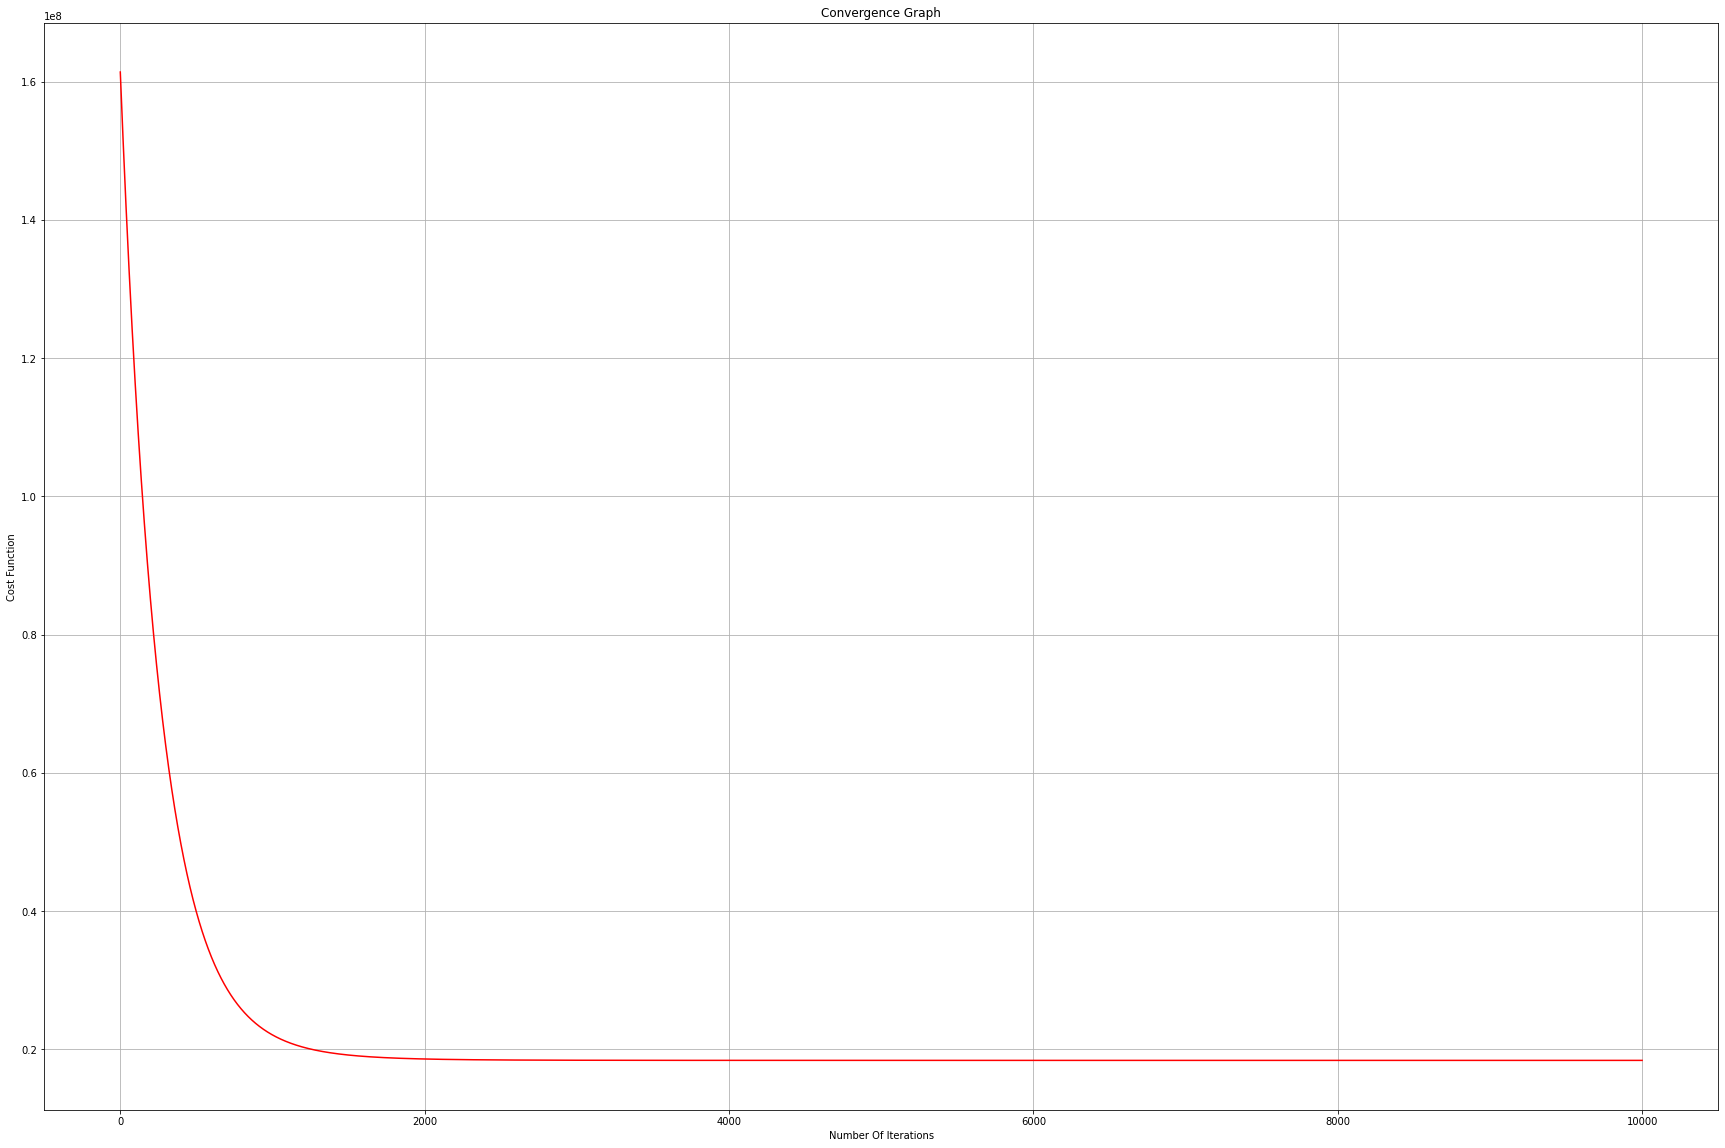

In [32]:
plt.plot(range(1,itrtn+1), cost_array,color='red')
plt.grid()
plt.xlabel("Number Of Iterations")
plt.ylabel("Cost Function")
plt.title("Convergence Graph")
plt.show()

### Testing The Model

In [33]:
def test(arr):
    #test_data=((np.array(arr)-mean)/sd)
    test_data= np.array(arr)
    test_data= ((test_data-mean)/sd)
    test_data = np.hstack((np.ones(1),test_data))
    charges = test_data.dot(theta)
    print('Predicted cost for health care: ', charges)

In [34]:
test([19,27.900,0,1,0,0,1,0,0,0,1]) 

Predicted cost for health care:  18210.827966617428


### Accuracy

In [35]:
#calculating accuracy
y_train_pred = X_train.dot(theta) + c
y_test_pred = X_test.dot(theta) + c

def accuracy_r2_error(y_pred,y):
    residuals = y - y_pred
    SS_res = np.sum(residuals*residuals)
    total = y - y.mean()
    SS_tot = np.sum(total*total)
    r2_error = 1 - (SS_res/SS_tot) 
    return r2_error

In [36]:
train_acc=accuracy_r2_error(y_train_pred, y_train)
print("Train accuracy:",train_acc)
test_acc=accuracy_r2_error(y_test_pred, y_test)
print("Test accuracy:",test_acc)

Train accuracy: 0.7469199991329505
Test accuracy: 0.7561912465573432
